<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Classification-with-Learn2ClassifyMany" data-toc-modified-id="Classification-with-Learn2ClassifyMany-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classification with Learn2ClassifyMany</a></span></li><li><span><a href="#Classification-using-NearestSubspace-Algorithm" data-toc-modified-id="Classification-using-NearestSubspace-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification using NearestSubspace Algorithm</a></span></li><li><span><a href="#Classification-using-a-Multi-layer-perceptron" data-toc-modified-id="Classification-using-a-Multi-layer-perceptron-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification using a Multi-layer perceptron</a></span><ul class="toc-item"><li><span><a href="#Classification-using-a-single-linear-layer-and-a-softmax-output-layer" data-toc-modified-id="Classification-using-a-single-linear-layer-and-a-softmax-output-layer-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Classification using a single linear layer and a softmax output layer</a></span></li><li><span><a href="#Classification-using-a-single-non-linear--layer-and-softmax-output-layer" data-toc-modified-id="Classification-using-a-single-non-linear--layer-and-softmax-output-layer-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Classification using a single non-linear  layer and softmax output layer</a></span></li><li><span><a href="#Classification-using-a-deep-network-and-softmax-output-layer" data-toc-modified-id="Classification-using-a-deep-network-and-softmax-output-layer-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Classification using a deep network and softmax output layer</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Loading the data

In [25]:
using JLD2, Plots
gr(
    label=""
)
include("deps.jl")  # plot dependencies 
@load "fashion_data.jld2" train_x  train_y test_x test_y

4-element Array{Symbol,1}:
 :train_x
 :train_y
 :test_x 
 :test_y 

In [26]:
size(train_x)

(28, 28, 60000)

In [27]:
size(train_y)

(60000,)

In [28]:
unique(train_y)

10-element Array{Int64,1}:
 9
 0
 3
 2
 7
 5
 1
 6
 4
 8

The `findall` command in the next cell returns the indices in `train_y` that equal `1`. The `[1]` returns the first element of that list. 

In [29]:
item_idx = 0:9
idx_first_item = findall(train_y .== item_idx[2])[1]

17

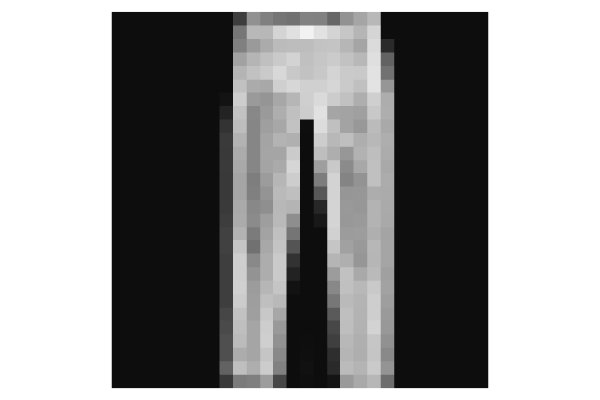

In [30]:
imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item]),color=:grays,transpose=:true)

**Exercise** : Write code to display all 10 items in a 2 x 5 grid.  

See [here](https://lectures.quantecon.org/jl/julia_plots.html) for examples using the `Plots` package.

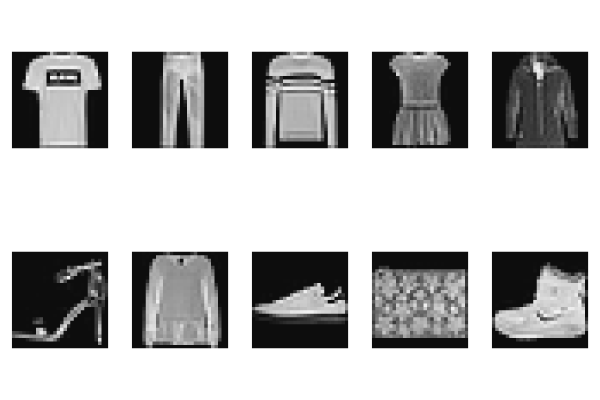

In [31]:
## TODO: Display all 10 items in a 2 x 5 grid
idx_first_item = [findall(train_y .== item_idx[i])[1] for i in 1:10]
p1 = imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item[1]]),color=:grays,transpose=:true)
p2 = imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item[2]]),color=:grays,transpose=:true)
p3 = imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item[3]]),color=:grays,transpose=:true)
p4 = imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item[4]]),color=:grays,transpose=:true)
p5 = imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item[5]]),color=:grays,transpose=:true)
p6 = imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item[6]]),color=:grays,transpose=:true)
p7 = imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item[7]]),color=:grays,transpose=:true)
p8 = imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item[8]]),color=:grays,transpose=:true)
p9 = imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item[9]]),color=:grays,transpose=:true)
p10 = imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item[10]]),color=:grays,transpose=:true)
# p = [imshow(convert(Array{Float64,2},train_x[:,:,idx_first_item[i]]),color=:grays,transpose
plot(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10;layout=(2, 5))

# Classification with Learn2ClassifyMany

In [32]:
include("MyLearn2ClassifyMany.jl")
using Main.MyLearn2ClassifyMany
using LinearAlgebra
using Statistics:mean

Initializing MyLearn2ClassifyMany module ... 


In [33]:
##TODO: Your code here using functions from your module  -- include a plot of P(correct versus number of number of classes)
num_digits = length(unique(train_y))
xtrain = Float64.(hcat((reshape(train_x, (:, size(train_x, 3))))))
xtest = Float64.(hcat((reshape(test_x, (:, size(test_x, 3))))));
ytrain = encoding_labels(train_y, num_digits);
ytest = encoding_labels(test_y, num_digits);

pcorrect[k - 1] = sum(class_predictions .== ytest .+ 1) / length(ytest) = 0.9805
pcorrect[k - 1] = sum(class_predictions .== ytest .+ 1) / length(ytest) = 0.956
pcorrect[k - 1] = sum(class_predictions .== ytest .+ 1) / length(ytest) = 0.913
pcorrect[k - 1] = sum(class_predictions .== ytest .+ 1) / length(ytest) = 0.853
pcorrect[k - 1] = sum(class_predictions .== ytest .+ 1) / length(ytest) = 0.8693333333333333
pcorrect[k - 1] = sum(class_predictions .== ytest .+ 1) / length(ytest) = 0.7877142857142857
pcorrect[k - 1] = sum(class_predictions .== ytest .+ 1) / length(ytest) = 0.789
pcorrect[k - 1] = sum(class_predictions .== ytest .+ 1) / length(ytest) = 0.7978888888888889
pcorrect[k - 1] = sum(class_predictions .== ytest .+ 1) / length(ytest) = 0.7969


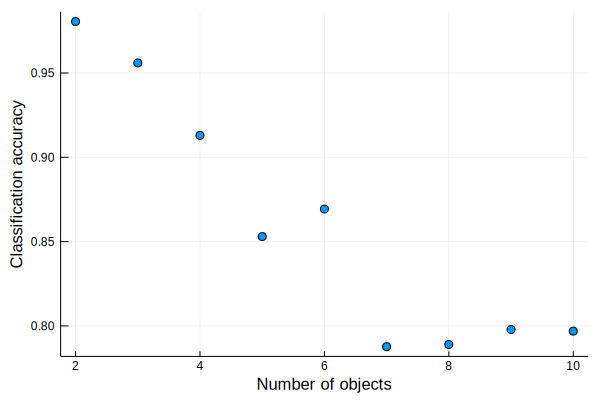

In [34]:
pcorrect = zeros(9)

for k in 2:10
    data_obj = 0:(k-1)
    num_obj = length(data_obj)
    
    index_train = hcat((findall(train_y .== i) for i in data_obj) ...)
    xtrain = hcat((reshape(train_x[:, :, index_train[:, i+1]], 784, :) for i in data_obj)...)
    ytrain = vcat((train_y[index_train[:, 1+i]] for i in data_obj)...)
    ytrain = encoding_labels(ytrain, k);
    
    index_test = hcat((findall(test_y .== i) for i in data_obj) ...)
    xtest = hcat((reshape(test_x[:, :, index_test[:, i+1]], 784, :) for i in data_obj)...)
    ytest = vcat((test_y[index_test[:, 1+i]] for i in data_obj)...)
    
    d = size(xtrain, 1)
    mu = 1e-6
    W0 = zeros(k, d);
    b0 = zeros(k);
    iters = 10000
    
    wtanh, btanh, loss_tanh = learn2classify_asgd_1layer(
    tanh, dtanh, xtrain, ytrain,
    W0, b0, mu, iters
    )
    
    Y = tanh.(wtanh * xtest .+ btanh)
    class_predictions = vec(mapslices(x -> findmax(x)[2], Y; dims=1))
    @show pcorrect[k-1] = sum(class_predictions .== (ytest.+1)) / length(ytest)
end
scatter(2:10, pcorrect; xlabel="Number of objects", ylabel="Classification accuracy")

# Classification using NearestSubspace Algorithm

In [35]:
include("MyNearestSubspaceClassifier.jl")
using Main.MyNearestSubspaceClassifier

Initializing MyNearestSubspaceClassifier module ... 


In [36]:
##TODO: Your code here  -- include a plot of P(correct versus k)
## Your plot should also include a line for nearest mean based classification 
num_obj = length(unique(train_y))

index_train = hcat((findall(train_y .== i) for i in 0:9) ...)
train_x_ns = hcat((reshape(train_x[:, :, index_train[:, i]], 784, :) for i in 1:10)...)
train_x_ns = reshape(train_x_ns, (784, :, num_obj))

index_test = hcat((findall(test_y .== i) for i in 0:9)...)
test_x_ns = hcat((reshape(test_x[:, :, index_test[:, i]], 784, :) for i in 1:10)...)
test_y_ns = vcat((test_y[index_test[:, i]] for i in 1:10)...)

trainU = learn_nearest_ss(train_x_ns, size(train_x_ns,1));
@show size(test_x_ns)

size(test_x_ns) = (784, 10000)


(784, 10000)

pcorrect_ss[num_obj - 1] = sum(test_label .== test_y_ns_k .+ 1) / length(test_y_ns_k) = 0.983
pcorrect_ss[num_obj - 1] = sum(test_label .== test_y_ns_k .+ 1) / length(test_y_ns_k) = 0.954
pcorrect_ss[num_obj - 1] = sum(test_label .== test_y_ns_k .+ 1) / length(test_y_ns_k) = 0.9235
pcorrect_ss[num_obj - 1] = sum(test_label .== test_y_ns_k .+ 1) / length(test_y_ns_k) = 0.851
pcorrect_ss[num_obj - 1] = sum(test_label .== test_y_ns_k .+ 1) / length(test_y_ns_k) = 0.8746666666666667
pcorrect_ss[num_obj - 1] = sum(test_label .== test_y_ns_k .+ 1) / length(test_y_ns_k) = 0.7915714285714286
pcorrect_ss[num_obj - 1] = sum(test_label .== test_y_ns_k .+ 1) / length(test_y_ns_k) = 0.793875
pcorrect_ss[num_obj - 1] = sum(test_label .== test_y_ns_k .+ 1) / length(test_y_ns_k) = 0.8063333333333333
pcorrect_ss[num_obj - 1] = sum(test_label .== test_y_ns_k .+ 1) / length(test_y_ns_k) = 0.8095


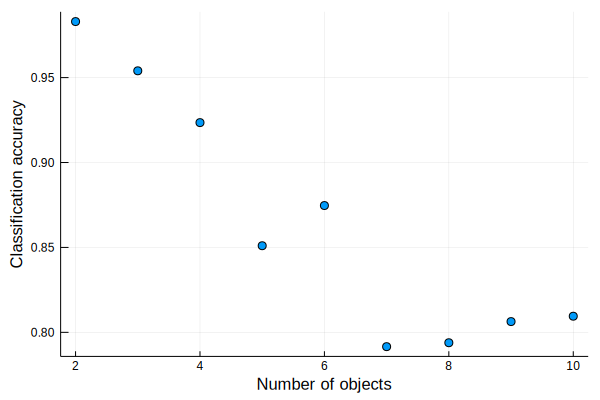

In [37]:
k = 8
pcorrect_ss = zeros(9)
for num_obj in 2:10
    data_obj = 0:num_obj-1
    test_x_ns_k = test_x_ns[:,1:num_obj*1000]
    test_y_ns_k = test_y_ns[1:num_obj*1000]
    test_label = classify_nearest_ss_alt(test_x_ns_k, trainU[:,:,1:num_obj], k)
    @show pcorrect_ss[num_obj-1] = sum((test_label .== (test_y_ns_k .+1)))/length(test_y_ns_k)
end
scatter(2:10, pcorrect_ss; xlabel="Number of objects", ylabel="Classification accuracy")

# Classification using a Multi-layer perceptron

In [38]:
using Flux 
using Flux
using Flux: onehotbatch, argmax, crossentropy, throttle, mse
using Flux:shuffle
using Base.Iterators: repeated, partition

## Classification using a single linear layer and a softmax output layer

pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.9855
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.9636666666666667
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.93175
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.88
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.897
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.818
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.82125
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.8398888888888889
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.8441


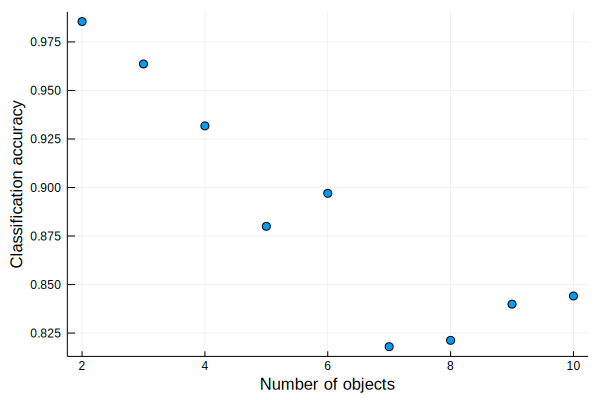

In [40]:
##TODO: Your code here  -- use one-hot encoding and cross entropy loss 
using Statistics
accuracy(x, y) = mean(onecold(m(x)) .== onecold(y))
evalcb = () -> @show([Tracker.data(loss(xtrain,ytrain)), accuracy(xtest, ytest)])

loss_fn = crossentropy
loss(x, y) = loss_fn(m(x),y)
opt = ADAM()

epochs = 10;
batch_size = 50;

pcorrect_nn = zeros(9)

for k in 2:10
    data_obj = 0:(k-1)
    num_obj = length(data_obj)
    
    index_train = hcat((findall(train_y .== i) for i in data_obj) ...)
    xtrain = hcat((reshape(train_x[:, :, index_train[:, i+1]], 784, :) for i in data_obj)...)
    ytrain = vcat((train_y[index_train[:, 1+i]] for i in data_obj)...)
    ytrain = onehotbatch(ytrain, 0:k-1);
    
    index_test = hcat((findall(test_y .== i) for i in data_obj) ...)
    xtest = hcat((reshape(test_x[:, :, index_test[:, i+1]], 784, :) for i in data_obj)...)
    ytest = vcat((test_y[index_test[:, 1+i]] for i in data_obj)...)
    ytest = onehotbatch(ytest, 0:k-1)
    
    m = Chain(Dense(784, k), softmax)
    for epoch_idx in 1:epochs
        dataset = [(xtrain[:, i],ytrain[:,i]) for i in partition(shuffle(1:size(xtrain, 2)),batch_size)]
        Flux.train!(loss, params(m), dataset, opt)
    end
    @show pcorrect_nn[k-1] = accuracy(xtest, ytest)
end
scatter(2:10, pcorrect_nn; xlabel="Number of objects", ylabel="Classification accuracy")

## Classification using a single non-linear  layer and softmax output layer

pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.982
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.9603333333333334
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.923
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.84
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.8448333333333333
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.7994285714285714
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.70975
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.8248888888888889
pcorrect_nn[k - 1] = accuracy(xtest, ytest) = 0.8291


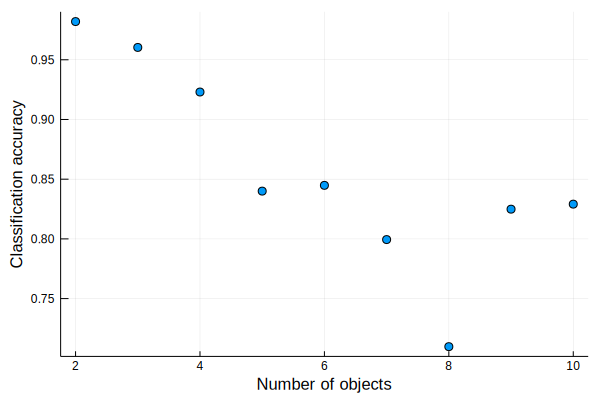

In [41]:
##TODO: Your code here  -- use one-hot encoding, non-linear activation for hidden layer, softmaxand cross entropy loss 
using Statistics
accuracy(x, y) = mean(onecold(m(x)) .== onecold(y))
evalcb = () -> @show([Tracker.data(loss(xtrain,ytrain)), accuracy(xtest, ytest)])

loss_fn = crossentropy
loss(x, y) = loss_fn(m(x),y)
opt = ADAM()

epochs = 10;
batch_size = 50;

pcorrect_nn = zeros(9)

for k in 2:10
    data_obj = 0:(k-1)
    num_obj = length(data_obj)
    
    index_train = hcat((findall(train_y .== i) for i in data_obj) ...)
    xtrain = hcat((reshape(train_x[:, :, index_train[:, i+1]], 784, :) for i in data_obj)...)
    ytrain = vcat((train_y[index_train[:, 1+i]] for i in data_obj)...)
    ytrain = onehotbatch(ytrain, 0:k-1);
        
    index_test = hcat((findall(test_y .== i) for i in data_obj) ...)
    xtest = hcat((reshape(test_x[:, :, index_test[:, i+1]], 784, :) for i in data_obj)...)
    ytest = vcat((test_y[index_test[:, 1+i]] for i in data_obj)...)
    ytest = onehotbatch(ytest, 0:k-1)
        
    m = Chain(Dense(784, k, σ), softmax)
    for epoch_idx in 1:epochs
        dataset = [(xtrain[:, i],ytrain[:,i]) for i in partition(shuffle(1:size(xtrain, 2)),batch_size)]
        Flux.train!(loss, params(m), dataset, opt)
    end
    @show pcorrect_nn[k-1] = accuracy(xtest, ytest)
                        
end
scatter(2:10, pcorrect_nn; xlabel="Number of objects", ylabel="Classification accuracy")

## Classification using a deep network and softmax output layer

The objective here is to design a deeper neural network that outperforms the single layer + `softmax` network. Many solutions are correct so you just need to come up with one with trial and error. 


In [ ]:
##TODO: Your code here  -- use one-hot encoding and MSE loss 
using Statistics
accuracy(x, y) = mean(onecold(m(x)) .== onecold(y))
evalcb = () -> @show([Tracker.data(loss(xtrain,ytrain)), accuracy(xtest, ytest)])

loss_fn = mse
loss(x, y) = loss_fn(m(x),y)
opt = ADAM()

epochs = 10;
batch_size = 50;

pcorrect_nn = zeros(9)

for k in 10:10
    data_obj = 0:(k-1)
    num_obj = length(data_obj)
    
    index_train = hcat((findall(train_y .== i) for i in data_obj) ...)
    xtrain = hcat((reshape(train_x[:, :, index_train[:, i+1]], 784, :) for i in data_obj)...)
    ytrain = vcat((train_y[index_train[:, 1+i]] for i in data_obj)...)
    ytrain = onehotbatch(ytrain, 0:k-1);
        
    index_test = hcat((findall(test_y .== i) for i in data_obj) ...)
    xtest = hcat((reshape(test_x[:, :, index_test[:, i+1]], 784, :) for i in data_obj)...)
    ytest = vcat((test_y[index_test[:, 1+i]] for i in data_obj)...)
    ytest = onehotbatch(ytest, 0:k-1)
        
    m = Chain(Dense(784, 256, relu), Dense(256, 32, relu), Dense(32, k,relu), softmax)
    for epoch_idx in 1:epochs
        dataset = [(xtrain[:, i],ytrain[:,i]) for i in partition(shuffle(1:size(xtrain, 2)),batch_size)]
        Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 1.0))
    end
    @show pcorrect_nn[k-1] = accuracy(xtest, ytest)
                        
end
scatter(2:10, pcorrect_nn; xlabel="Number of objects", ylabel="Classification accuracy")

[Tracker.data(loss(xtrain, ytrain)), accuracy(xtest, ytest)] = [0.0892891, 0.1682]
[Tracker.data(loss(xtrain, ytrain)), accuracy(xtest, ytest)] = [0.0579441, 0.5838]
[Tracker.data(loss(xtrain, ytrain)), accuracy(xtest, ytest)] = [0.0465883, 0.668]
[Tracker.data(loss(xtrain, ytrain)), accuracy(xtest, ytest)] = [0.0450152, 0.6609]
[Tracker.data(loss(xtrain, ytrain)), accuracy(xtest, ytest)] = [0.0429014, 0.6692]
[Tracker.data(loss(xtrain, ytrain)), accuracy(xtest, ytest)] = [0.0392648, 0.695]
[Tracker.data(loss(xtrain, ytrain)), accuracy(xtest, ytest)] = [0.0368464, 0.7144]
[Tracker.data(loss(xtrain, ytrain)), accuracy(xtest, ytest)] = [0.037294, 0.7099]
[Tracker.data(loss(xtrain, ytrain)), accuracy(xtest, ytest)] = [0.0356393, 0.7286]
[Tracker.data(loss(xtrain, ytrain)), accuracy(xtest, ytest)] = [0.0342575, 0.7295]
[Tracker.data(loss(xtrain, ytrain)), accuracy(xtest, ytest)] = [0.0388504, 0.6969]
[Tracker.data(loss(xtrain, ytrain)), accuracy(xtest, ytest)] = [0.0345131, 0.7242]
[Tracke

# Summary

In [ ]:
using DataFrames

Create a `DataFrame` that summarizes the performance of the various methods. Submit this table.

See [here](https://github.com/bkamins/Julia-DataFrames-Tutorial/blob/master/01_constructors.ipynb) for instructions on how to create a DataFrame.

In [ ]:
x = Dict(:A => ["Learn2classify many", "Nearest Subspace classification", "Single Linear", "Single non-linear(sigmoid)", "Deep network(sigmoid)"], 
         :B => [0.7942, 0.8095, 0.8475, 0.8282, 0.8767])
DataFrame(x)